In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import xarray as xr
import pyrsktools
import glob
import seawater
import datetime
import matplotlib.cm as cm
 
%matplotlib widget

ruskinname = './ruskin/206664_20220928_0758.rsk'

In [29]:
#
#1048, 6554
#11076, 13836
31075, 32253
34209, 35076
36871, 37987
39657, 40814
42687, 45261
48193, 50953
53500, 55950

Casts = {'H1': [1048, 6554],
         'A2': [11076, 13836],
        'A3': [16823, 18725],
        'A5': [22205, 24407],
        'S8': [26869, 28278],
        'S5.5': [31075, 32253],
         'S5': [34209, 35076],
         'S12.5': [36871, 37987],
         'S12': [39657, 40814],
         'S4.5': [42687, 45261],
         'S4.25': [48193, 50953],
         'S4': [53500, 55950]
        }



## Note to get the downcasts and lat/lon you need to run Rskin software!!!



In [30]:
# rsk to xarray
with pyrsktools.open(ruskinname) as rsk:
    channel_names = rsk.channels.keys()
    print(channel_names)
    print(rsk.npsamples()['conductivity_00'])
    for nn, cast in enumerate(Casts):
        start = Casts[cast][0]
        stop = Casts[cast][1]
        time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]
        print('time', time[0])
        ds = xr.Dataset(coords={'time':time})
        ds.attrs = {'start_time': str(time[0]),
                    'end_time': str(time[-1]),
                    'serial_number': rsk.instrument.serial,
                    'model': rsk.instrument.model,
                    'firmware_version': rsk.instrument.firmware_version,
                    'firmware_type': str(rsk.instrument.firmware_type),
                    }

        for channel in channel_names:
            ds[channel] = ('time', rsk.npsamples()[channel][start:stop])
            ds[channel].attrs = {'units': rsk.channels[channel].units,
                                 'derived': str(rsk.channels[channel].derived),
                                 'long_name': rsk.channels[channel].name}
        ds['potential_density'] = ('time', seawater.eos80.pden(ds.salinity_00, ds.temperature_00, ds.pressure_00-10.0, 0))
        ds['station_name'] = cast
            
        outname = f'casts/{rsk.instrument.serial}'
        outname += '_' + time[0].astype(datetime.datetime).strftime('%Y%m%d%H%M%S') + '.nc'
        ds.to_netcdf(outname)
 

odict_keys(['conductivity_00', 'temperature_00', 'pressure_00', 'chlorophyll_00', 'oxygensaturation_00', 'par_00', 'seapressure_00', 'depth_00', 'salinity_00', 'speedofsound_00', 'specificconductivity_00'])
[0.00185804 0.00097282 0.00101026 ... 0.00161695 0.00117774 0.00123267]


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_80134/1048099941.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]


time 2022-09-28T16:31:47.250


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_80134/1048099941.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]


time 2022-09-28T17:13:19.500


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_80134/1048099941.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]


time 2022-09-28T17:43:06.250


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_80134/1048099941.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]


time 2022-09-28T18:06:28.250


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_80134/1048099941.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]


time 2022-09-28T18:30:37.000


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_80134/1048099941.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]


time 2022-09-28T21:35:23.250


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_80134/1048099941.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]


time 2022-09-28T21:54:07.875


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_80134/1048099941.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]


time 2022-09-28T22:05:31.000


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_80134/1048099941.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]


time 2022-09-28T22:21:27.625


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_80134/1048099941.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]


time 2022-09-28T22:38:00.125


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_80134/1048099941.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]


time 2022-09-28T22:57:38.500


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_80134/1048099941.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  time = rsk.npsamples()['timestamp'].astype('datetime64[ms]')[start:stop]


time 2022-09-28T23:19:09.500


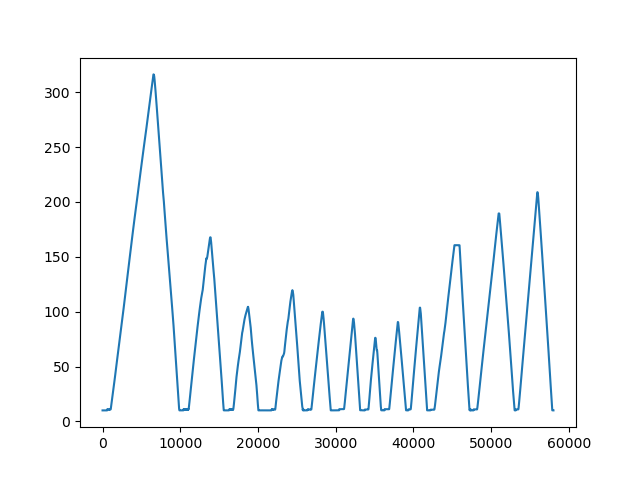

In [28]:

with pyrsktools.open(ruskinname) as rsk:
    channel_names = rsk.channels.keys()
    fig, ax = plt.subplots()
    ax.plot(rsk.npsamples()['pressure_00'])


In [ ]:
31075, 32253
34209, 35076
36871, 37987
39657, 40814
42687, 45261
48193, 50953
53500, 55950 





In [31]:
!rm CTDGrid.nc
dat = glob.glob('casts/*.nc')
dat.sort()
Ncasts = len(dat)
depthbins = np.arange(-0.5, 250.5, 1)
depths = depthbins[:-1] + 0.5
grid = xr.Dataset(coords={'depths':depths, 'cast':np.arange(Ncasts)})
sources = {'pressure': 'seapressure_00', 'temperature': 'temperature_00',
           'conductivity': 'conductivity_00', 'chlorophyll':'chlorophyll_00',
           'oxygensaturation':'oxygensaturation_00', 'salinity': 'salinity_00',
           'par':'par_00', 'potential_density':'potential_density'}

grid['time'] = ('cast', np.zeros(Ncasts))
for s in sources:
    grid[s] = (('depths', 'cast'), np.zeros((len(depths), Ncasts)))

grid['station_name'] = (('cast'), ['long_empty_string'] * Ncasts)

for nn, d in enumerate(dat):
    with xr.open_dataset(d) as ds:
        grid['time'][nn] = ds.time[0]
        for s in sources:
            grid[s][:, nn] = (np.histogram(ds.depth_00, depthbins, weights=ds[sources[s]])[0] /
                              np.histogram(ds.depth_00, depthbins)[0])
            if nn == len(dat)-1:
                grid[s].attrs = ds[sources[s]].attrs

    grid['station_name'][nn] = ds.station_name
grid.time.attrs = {"units": 'nanoseconds since 1970-01-01T00:00:00'}

grid.to_netcdf('CTDGrid.nc')          



/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_80134/2878381374.py:23: RuntimeWarning: invalid value encountered in true_divide
  grid[s][:, nn] = (np.histogram(ds.depth_00, depthbins, weights=ds[sources[s]])[0] /
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_80134/2878381374.py:23: RuntimeWarning: invalid value encountered in true_divide
  grid[s][:, nn] = (np.histogram(ds.depth_00, depthbins, weights=ds[sources[s]])[0] /
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_80134/2878381374.py:23: RuntimeWarning: invalid value encountered in true_divide
  grid[s][:, nn] = (np.histogram(ds.depth_00, depthbins, weights=ds[sources[s]])[0] /
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_80134/2878381374.py:23: RuntimeWarning: invalid value encountered in true_divide
  grid[s][:, nn] = (np.histogram(ds.depth_00, depthbins, weights=ds[sources[s]])[0] /
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_80134/2878381374.py:23: RuntimeWarnin

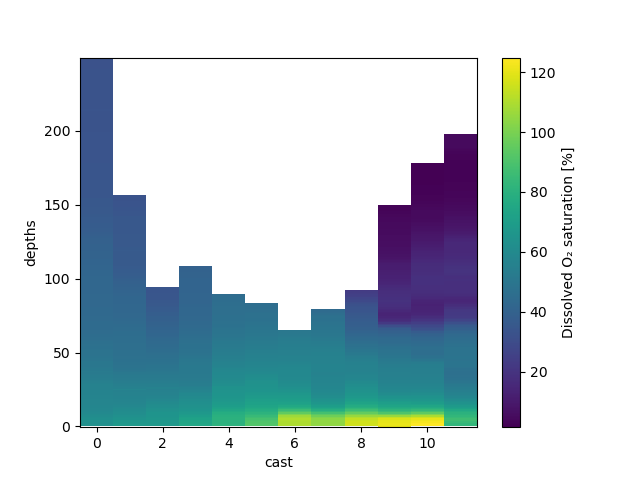

In [32]:
# print(grid)
fig, ax = plt.subplots()
grid['oxygensaturation'].plot.pcolormesh()

In [33]:
with pyrsktools.open(ruskinname) as rsk:
    Ngeo = len(list(rsk.geodata()))
    geods = xr.Dataset(coords={'sample': np.arange(0, Ngeo)})
    geods['time'] = ('sample', np.zeros(Ngeo))
    geods['latitude'] = ('sample', np.zeros(Ngeo))
    geods['longitude'] = ('sample', np.zeros(Ngeo))
    
    for nn, geo in enumerate(rsk.geodata()):
        geods['time'][nn] = np.datetime64(geo.timestamp)
        geods['latitude'][nn] = geo.latitude
        geods['longitude'][nn] = geo.longitude
geods.time.attrs = {"units": 'nanoseconds since 1970-01-01T00:00:00'}

geods.to_netcdf('Geo.nc')




/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_80134/2684484812.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  geods['time'][nn] = np.datetime64(geo.timestamp)


In [34]:
geods

<xarray.Dataset>
Dimensions:    (sample: 18391)
Coordinates:
  * sample     (sample) int64 0 1 2 3 4 5 ... 18386 18387 18388 18389 18390
Data variables:
    time       (sample) float64 1.664e+18 1.664e+18 ... 1.664e+18 1.664e+18
    latitude   (sample) float64 48.63 48.72 48.63 48.63 ... 48.64 48.64 48.64
    longitude  (sample) float64 -123.5 -123.2 -123.5 ... -123.5 -123.5 -123.5

<xarray.Dataset>
Dimensions:            (depths: 250, cast: 12)
Coordinates:
  * depths             (depths) float64 0.0 1.0 2.0 3.0 ... 247.0 248.0 249.0
  * cast               (cast) int64 0 1 2 3 4 5 6 7 8 9 10 11
Data variables:
    time               (cast) datetime64[ns] 2022-09-28T16:31:47.249999872 .....
    pressure           (depths, cast) float64 ...
    temperature        (depths, cast) float64 ...
    conductivity       (depths, cast) float64 ...
    chlorophyll        (depths, cast) float64 ...
    oxygensaturation   (depths, cast) float64 ...
    salinity           (depths, cast) float64 ...
    par                (depths, cast) float64 ...
    potential_density  (depths, cast) float64 ...
    station_name       (cast) object ...
    longitude          (cast) float64 -123.2 -123.3 -123.3 ... -123.5 -123.5
    latitude           (cast) float64 48.71 48.74 48.77 ... 48.67 48.66 48.64

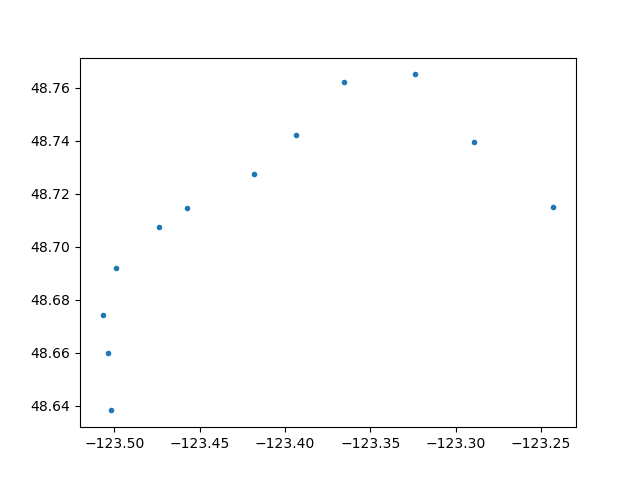

In [36]:
with xr.open_dataset('Geo.nc', engine='netcdf4') as geods, xr.open_dataset('CTDGrid.nc', engine='netcdf4') as cgrid:
    cgrid['longitude'] = ('cast', np.interp(cgrid.time, geods.time, geods.longitude))
    cgrid['latitude'] = ('cast', np.interp(cgrid.time, geods.time, geods.latitude))
          
#cgrid['longitude'][66] = -125 - 10.770 / 60.0
#cgrid['latitude'][66] = 48 + 52.603 / 60.0
#cgrid['longitude'][67] = -125 - 06.918 / 60.0
#cgrid['latitude'][67] = 48 + 52.241 / 60.0

display(cgrid)
    
# names:
fig, ax = plt.subplots()
ax.plot(cgrid.longitude, cgrid.latitude, '.')


cgrid.to_netcdf('CTDGridGeo.nc')          


In [51]:
# get approx bottom depth from bathy file...
from scipy import interpolate
with xr.open_dataset('../topo/BarkleyTopo.nc') as topo:
    f = interpolate.RectBivariateSpline(topo.longitude, topo.latitude, topo.elevation.T)
    depths = f(cgrid.longitude, cgrid.latitude, grid=False)
cgrid['topo_depth'] = ('cast', depths)
cgrid.to_netcdf('CTDGridGeo.nc')          



In [52]:
# save as matlab

import scipy.io as sio
matdict = {}
for k in cgrid:
    try:
        matdict[k] = cgrid[k].to_numpy().astype('float')
    except:
        matdict[k] = [str(st) for st in cgrid[k].values]

matdict['time'] = matdict['time'] / 1e9 / 24 / 3600
matdict['time'] += (np.datetime64('1970-01-01T00:00:00','D') - 
                    np.datetime64('0000-01-01T00:00:00', 'D')).astype('float') - 1.0
sio.savemat('CTDGridGeo.mat', matdict)


In [53]:
# save csv

for cast in range(Ncasts):
    df = cgrid.isel(cast=cast).to_pandas()
    csv_name = 'ctdgrid_csv/ctd' + str(cgrid.station_name[cast].values) + '.csv'
    df.to_csv(csv_name)


In [54]:
# save csv united
import pandas as pd

for cast in range(Ncasts):
    df = cgrid.isel(cast=cast).to_pandas()
    df.dropna(subset = ["conductivity"], inplace=True)
    
    if cast == 0:
        pdf = df
    else:
        pdf = pd.concat([pdf, df])
        
pdf.to_csv('CTDGridGeo.csv')
#    csv_name = 'ctdgrid_csv/ctd' + str(cgrid.station_name[cast].values) + '.csv'
#    pd.to_csv(csv_name)
print(pdf)

        cast                          time   pressure  temperature  \
depths                                                               
0.0        0 2022-04-29 22:24:04.124999936   0.382235    10.662628   
1.0        0 2022-04-29 22:24:04.124999936   0.888448    10.642341   
2.0        0 2022-04-29 22:24:04.124999936   2.012341    10.577917   
3.0        0 2022-04-29 22:24:04.124999936   2.999245    10.194552   
4.0        0 2022-04-29 22:24:04.124999936   4.006251     9.882231   
...      ...                           ...        ...          ...   
43.0      74 2022-05-05 00:52:00.750000128  43.385565     8.290924   
44.0      74 2022-05-05 00:52:00.750000128  44.364472     8.296384   
45.0      74 2022-05-05 00:52:00.750000128  45.427240     8.299593   
46.0      74 2022-05-05 00:52:00.750000128  46.329211     8.310198   
47.0      74 2022-05-05 00:52:00.750000128  47.616973     8.324071   

        conductivity  chlorophyll  oxygensaturation   salinity         par  \
depths     

## Plot

# location


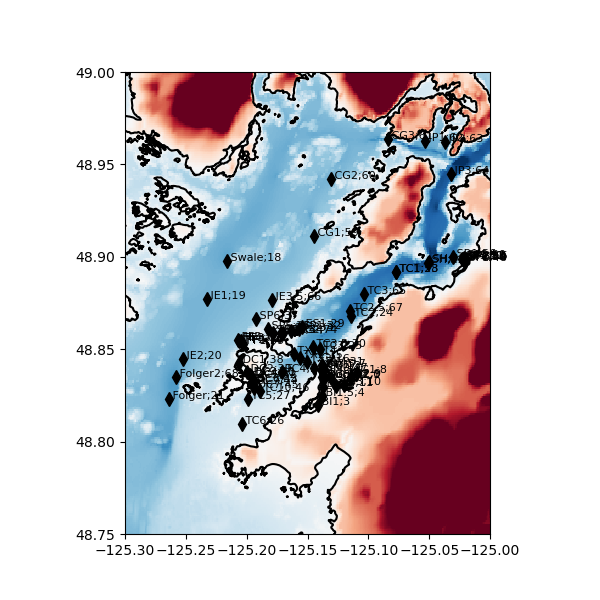

In [56]:
with (xr.open_dataset('CTDGridGeo.nc') as ds, 
      xr.open_dataset('../topo/BarkleyTopo.nc') as topo, 
      xr.open_dataset('../topo/BMS_coastline.nc') as coast):
    

    fig, ax = plt.subplots(figsize=(6, 6))
    
    ax.pcolormesh(topo.longitude, topo.latitude, topo.elevation, 
                  rasterized=True, cmap='RdBu_r', vmin=-200, vmax=200)
    ax.plot(coast.lon, coast.lat, color='k')
    ax.plot(ds.longitude, ds.latitude, 'kd', markersize=7)
    for n in range(ds.dims['cast']):
        d = ds.isel(cast=n)
        ax.text(d.longitude, d.latitude, ' ' + str(d.station_name.values) + f';{n}', fontsize=8)
    ax.set_aspect(1 / np.cos(np.pi * 48.8 / 180))
    ax.set_ylim(48.75, 49.0)
    ax.set_xlim(-125.3, -125.0)
    fig.savefig('doc/CTDStations.pdf', dpi=200)
    plt.show()

In [57]:
thalweg = ['Folger', 'IE2', 'IE1', 'Swale', 'CG1', 'CG2', 'CG3', 'JP1', 'JP2', 'JP3', 'SH', 'TC1', 'TC3', 'TC2.5', 'TC2',
           'TX3', 'TC4', 'TC10', 'TC5', 'TC6']

In [48]:
!mkdir doc

<xarray.Dataset>
Dimensions:            (depths: 250, cast: 12)
Coordinates:
  * depths             (depths) float64 0.0 1.0 2.0 3.0 ... 247.0 248.0 249.0
  * cast               (cast) int64 0 1 2 3 4 5 6 7 8 9 10 11
Data variables:
    time               (cast) datetime64[ns] ...
    pressure           (depths, cast) float64 ...
    temperature        (depths, cast) float64 ...
    conductivity       (depths, cast) float64 ...
    chlorophyll        (depths, cast) float64 ...
    oxygensaturation   (depths, cast) float64 ...
    salinity           (depths, cast) float64 ...
    par                (depths, cast) float64 ...
    potential_density  (depths, cast) float64 ...
    station_name       (cast) object ...
    longitude          (cast) float64 ...
    latitude           (cast) float64 ...


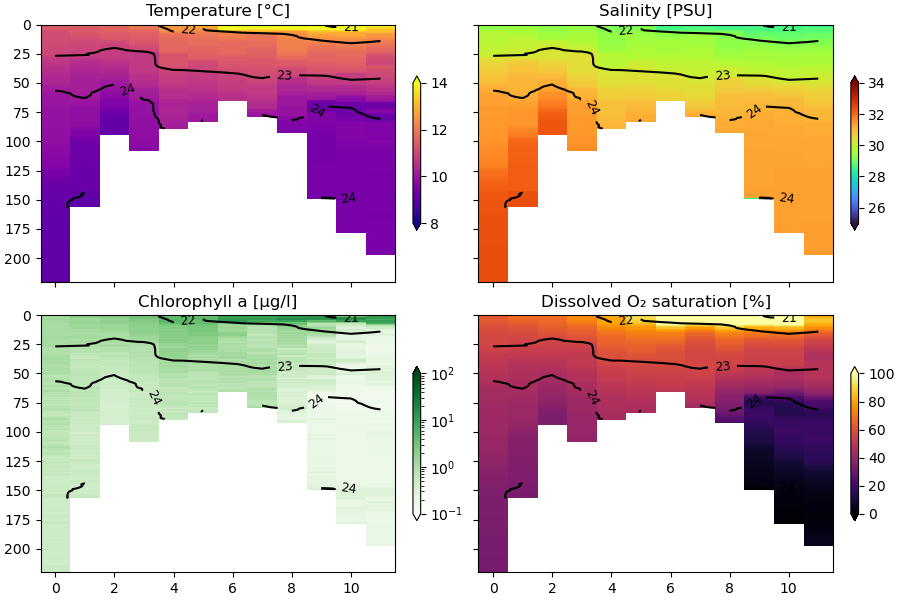

In [37]:
import matplotlib.colors as mcolors
def contour(ax, ds):
    cs = ax.contour(ds.cast, ds.depths, ds.potential_density - 1000,
               levels=np.arange(20, 26), colors='k')
    ax.clabel(cs, fontsize=9)
    
clim = {'temperature': [8, 14], 'salinity': [25, 34], 'chlorophyll': [0.1, 100], 
        'oxygensaturation': [0, 100]}
cmap = {'temperature': 'plasma', 'salinity' : 'turbo', 'chlorophyll': 'Greens',
       'oxygensaturation': 'inferno'}
norm = {'temperature': mcolors.Normalize(*clim['temperature']), 
        'salinity' : mcolors.Normalize(*clim['salinity']), 
        'chlorophyll': mcolors.LogNorm(*clim['chlorophyll']),
       'oxygensaturation': mcolors.Normalize(*clim['oxygensaturation'])}
       
with xr.open_dataset('CTDGridGeo.nc') as ds:
    print(ds)
    fig, axs = plt.subplots(2, 2, constrained_layout=True, sharex=True, sharey=True, 
                            figsize=(9, 6))
    axs = axs.flatten()
    for nn, todo in enumerate(clim):
        ax = axs[nn]
        pc = ax.pcolormesh(ds.cast, ds.depths, ds[todo], rasterized=True, 
                            cmap=cmap[todo], norm=norm[todo])
        contour(ax, ds)

        fig.colorbar(pc, ax=ax, shrink=0.6, extend='both')
        ax.set_ylim(220, 0)
        ax.set_title(ds[todo].attrs['long_name']+ ' [' + ds[todo].attrs['units'] + ']')

    fig.savefig('doc/CTD.pdf')
    #ax.set_ylim(30, 0)
    #ax.set_xlim([48, 60])
    
    #ax.set_xlim(32, 37)
    #ax.set_ylim(70, 0)
    
    #fig.savefig('doc/CTDZoom.pdf')
    

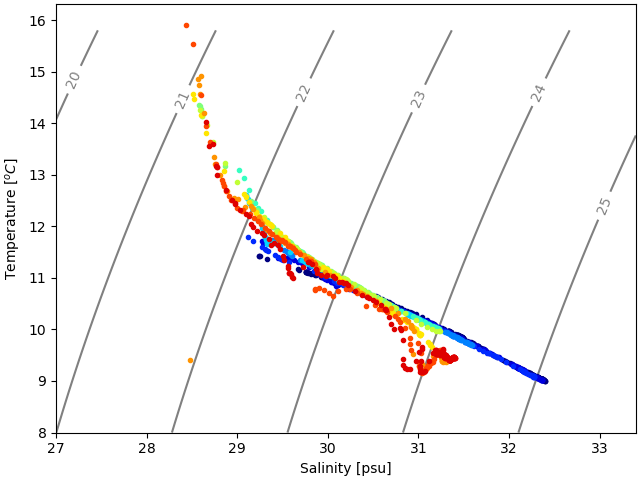

In [38]:
with xr.open_dataset('CTDGridGeo.nc') as ds:
    fig, axs = plt.subplots(constrained_layout=True, sharex=True, sharey=True)
    s = np.arange(27, 33.5, 0.2)
    t = np.arange(8, 16, 0.2)
    S, T = np.meshgrid(s,t)
    pden = seawater.pden(S, T, 0*S)-1000
    cs = axs.contour(s, t, pden, np.arange(20, 26), colors='0.5')
    ax.clabel(cs)
    cmap = cm.jet
    for n in range(ds.sizes['cast']):
        cast = ds.sel(cast=n)
        axs.plot(cast.salinity, cast.temperature , '.', color=cmap(n/ds.sizes['cast']))
        axs.set_xlabel('Salinity [psu]')
        axs.set_ylabel('Temperature $[^oC]$')
        



In [50]:
import matplotlib.colors as mcolors
def contour(ax, ds):
    return ax.contour(thalwegpos, ds.depths, ds.potential_density - 1000,
               levels=np.arange(20, 26), colors='k')

clim = {'temperature': [6, 11], 'salinity': [22, 33], 'chlorophyll': [0.1, 100], 
        'oxygensaturation': [0, 130]}
cmap = {'temperature': 'plasma', 'salinity' : 'turbo', 'chlorophyll': 'Greens',
       'oxygensaturation': 'inferno'}
norm = {'temperature': mcolors.Normalize(*clim['temperature']), 
        'salinity' : mcolors.Normalize(*clim['salinity']), 
        'chlorophyll': mcolors.LogNorm(*clim['chlorophyll']),
       'oxygensaturation': mcolors.Normalize(*clim['oxygensaturation'])}
       
with xr.open_dataset('CTDGridGeo.nc') as ds:
    todo = []
    for nn, name in enumerate(thalweg):
        ind = np.where(ds.station_name.values==name)[0]
        print(name)
        if len(ind) > 0:
            todo += [ind[0]]
    print(todo)
    
    
    ds = ds.isel(cast=todo)
    
    thalwegpos = np.arange(len(todo))
    print(thalwegpos)
    
    print(todo)
    
    print(ds)
    cast_ind = np.arange(len(todo))
    fig, axs = plt.subplots(2, 2, constrained_layout=True, sharex=True, sharey=True, 
                            figsize=(9, 6))
    axs = axs.flatten()
    for nn, todo in enumerate(clim):
        ax = axs[nn]
        pc = ax.pcolormesh(thalwegpos, ds.depths, ds[todo], rasterized=True, 
                            cmap=cmap[todo], norm=norm[todo])
        cl = contour(ax, ds)
        if nn == 2:
            ax.clabel(cl, fontsize=9)

        for nn, st in enumerate(ds.station_name):
            ax.text(thalwegpos[nn], 160, st.values, rotation=90)
        fig.colorbar(pc, ax=ax, shrink=0.6, extend='both')
        ax.set_ylim(175, 0)
        ax.set_title(ds[todo].attrs['long_name']+ ' [' + ds[todo].attrs['units'] + ']')

        
    fig.savefig('doc/CTDThalweg.pdf')
    #ax.set_ylim(30, 0)
    #ax.set_xlim([48, 60])
    
    #ax.set_xlim(32, 37)
    #ax.set_ylim(70, 0)
    
    #fig.savefig('doc/CTDZoom.pdf')
    

NameError: name 'thalweg' is not defined

Folger
IE2
IE1
Swale
CG1
CG2
CG3
JP1
JP2
JP3
SH
TC1
TC3
TC2.5
TC2
TX3
TC4
TC10
TC5
TC6
[21, 20, 19, 18, 59, 60, 61, 62, 63, 64, 22, 23, 25, 67, 24, 16, 28, 46, 27, 26]


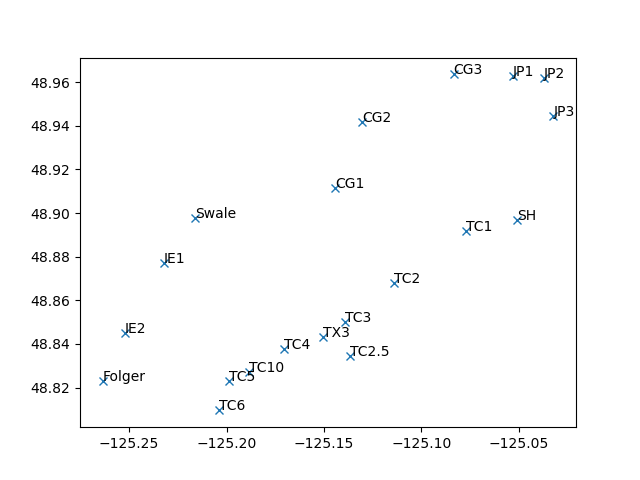

In [35]:
import matplotlib.colors as mcolors
def contour(ax, ds):
    return ax.contour(thalwegpos, ds.depths, ds.potential_density - 1000,
               levels=np.arange(20, 26), colors='k')

clim = {'temperature': [8, 11], 'salinity': [22, 33], 'chlorophyll': [0.1, 100], 
        'oxygensaturation': [0, 130]}
cmap = {'temperature': 'plasma', 'salinity' : 'turbo', 'chlorophyll': 'Greens',
       'oxygensaturation': 'inferno'}
norm = {'temperature': mcolors.Normalize(*clim['temperature']), 
        'salinity' : mcolors.Normalize(*clim['salinity']), 
        'chlorophyll': mcolors.LogNorm(*clim['chlorophyll']),
       'oxygensaturation': mcolors.Normalize(*clim['oxygensaturation'])}
       
with xr.open_dataset('CTDGridGeo.nc') as ds:
    todo = []
    for nn, name in enumerate(thalweg):
        ind = np.where(ds.station_name.values==name)[0]
        print(name)
        if len(ind) > 0:
            todo += [ind[0]]
    print(todo)
    
    
    ds = ds.isel(cast=todo)
    
    fig, ax = plt.subplots()
    ax.plot(ds.longitude, ds.latitude, 'x')
    for ind in range(len(ds.longitude)):
        ax.text(ds.longitude[ind], ds.latitude[ind], ds.station_name[ind].values)
    fig.savefig('LocThal.pdf')
    #ax.set_xlim(32, 37)
    #ax.set_ylim(70, 0)
    
    #fig.savefig('doc/CTDZoom.pdf')
    

<IPython.core.display.Javascript object>


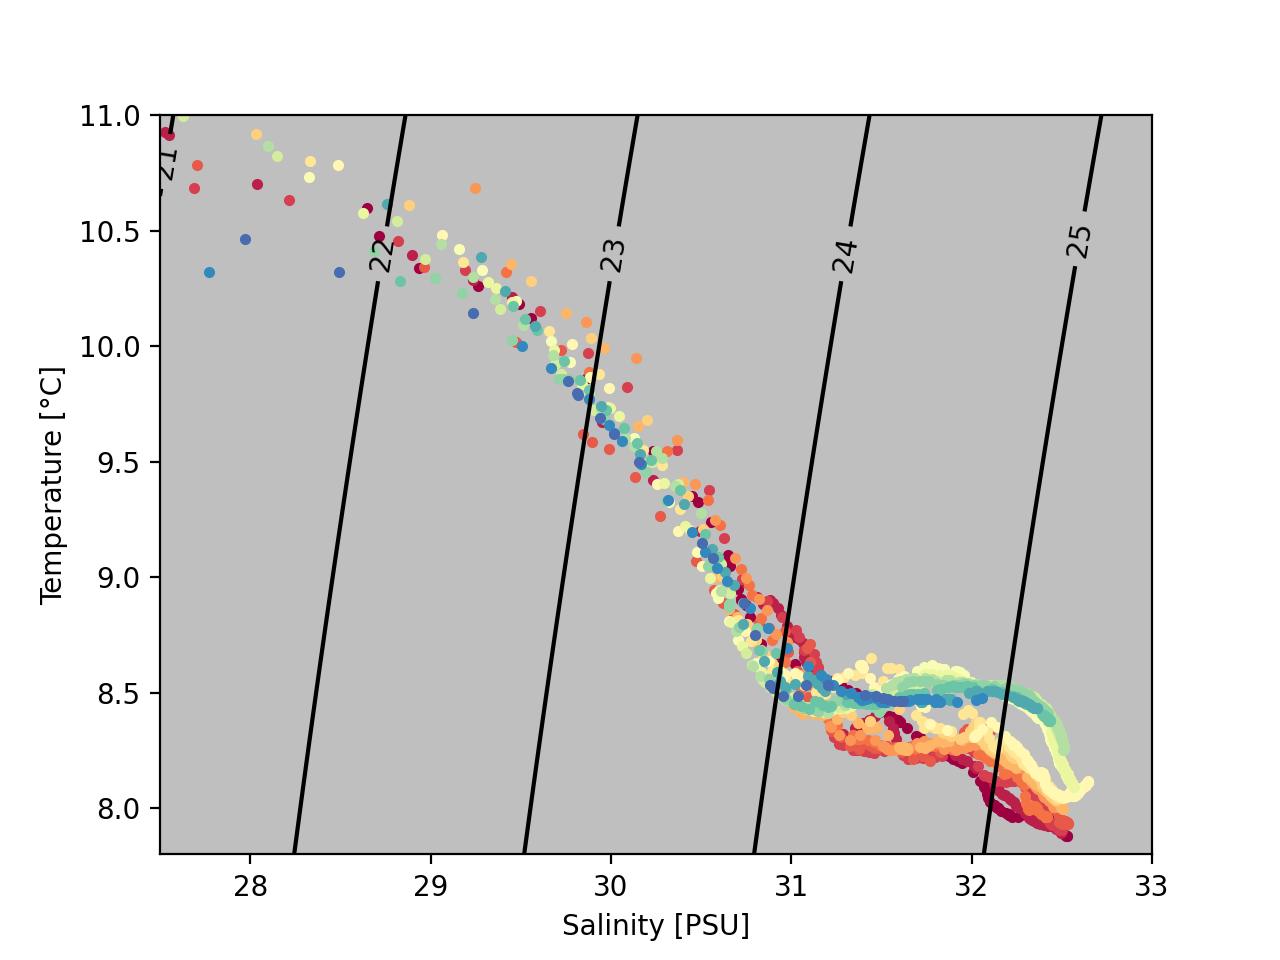

In [35]:
fig, ax = plt.subplots()
cmap = matplotlib.cm.get_cmap('Spectral')
N = ds.dims['cast']
for ind in range(ds.dims['cast']):
    ax.plot(ds.isel(cast=ind).salinity, ds.isel(cast=ind).temperature, '.', color=cmap(ind/N));
ax.set_xlim(27.5, 33)
ax.set_ylim(7.8, 11)
ax.set_facecolor('0.75')
t = np.arange(7.8, 11.2, 0.1)
s = np.arange(27.5, 33, 0.1)
S, T = np.meshgrid(s, t)
pd = seawater.eos80.pden(S, T, 0 * T, 0) -1000
cl = ax.contour(s, t, pd, levels = np.arange(20, 26), colors='k')
ax.clabel(cl)
todo = 'temperature'
ax.set_ylabel(ds[todo].attrs['long_name']+ ' [' + ds[todo].attrs['units'] + ']')
todo = 'salinity'
ax.set_xlabel(ds[todo].attrs['long_name']+ ' [' + ds[todo].attrs['units'] + ']')
fig.savefig('doc/TS.pdf')

In [3]:
with xr.open_dataset('CTDGridGeo.nc') as ds:
    print(ds.chlorophyll)

<xarray.DataArray 'chlorophyll' (depths: 250, cast: 75)>
array([[ 4.387768,  4.605988,  5.160199, ...,  2.761467,  2.762946,  1.184418],
       [ 4.407021,  4.663315,  4.565247, ...,  3.291332,  2.869837,  1.430929],
       [13.200215,  5.524154, 18.504913, ...,  3.512791,  3.494337,  2.008702],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan]])
Coordinates:
  * depths   (depths) float64 0.0 1.0 2.0 3.0 4.0 ... 246.0 247.0 248.0 249.0
  * cast     (cast) int64 0 1 2 3 4 5 6 7 8 9 ... 65 66 67 68 69 70 71 72 73 74
Attributes:
    units:      µg/l
    derived:    False
    long_name:  Chlorophyll a
